In [1]:
from IPython.display import SVG
import pandas as pd
from src.post_processing import PathWrangler
from src.config import filepaths
from src.utils import load_json
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
rules = pd.read_csv(filepaths['rules'] / "minimal1224_all_uniprot.tsv", sep='\t')
rules.set_index("Name", inplace=True)

pw = PathWrangler(
    path_filepath= filepaths['processed_expansions'] / 'found_paths.json',
    pr_filepath= filepaths['processed_expansions'] / 'predicted_reactions.json',
    kr_filepath= filepaths['processed_expansions'] / 'known_reactions.json',
)

def show_problem(pid: str, step: int, pw: PathWrangler = pw, rules: pd.DataFrame = rules):
    p = pw.get_path_with_id(pid)
    pr = p.reactions[step]
    a = pr.top_analogues(k=1)[0]
    pr_ops = set([o for o in pr.operators])
    a_ops = set([o for o in a.operators])
    inter_rules = pr_ops & a_ops
    print(f"Common intermediate operator(s): {inter_rules}")
    for rule in inter_rules:
        minified = rule.split('_')[0]
        print(f"Minified version: {rules.loc[minified, 'SMARTS']}")
        
    print("\nPredicted reaction")
    display(SVG(pr.image))

    print("Analogue")
    display(SVG(a.image))

Common intermediate operator(s): {'rule0004_13'}
Minified version: [#6:1].[#6:2]1=[#6:3]-[#7:4]-[#6:5]=[#6:6]-[#6:7]-1.[#8:8]=[#8:9]>>[#6:1]-[#8:8].[#6:2]1:[#6:7]:[#6:6]:[#6:5]:[#7+:4]:[#6:3]:1.[#8:9]

Predicted reaction


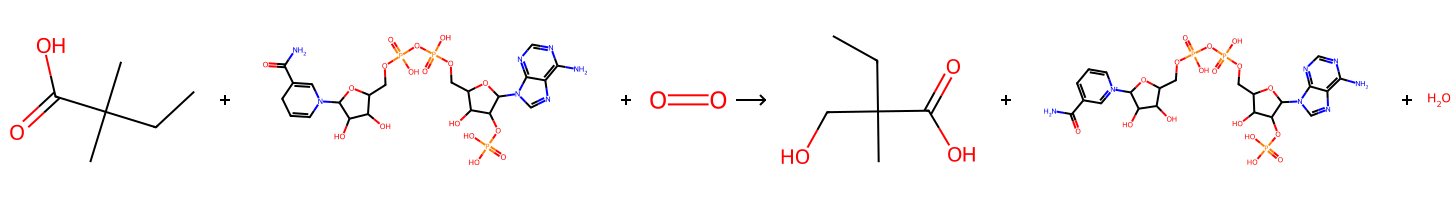

Analogue


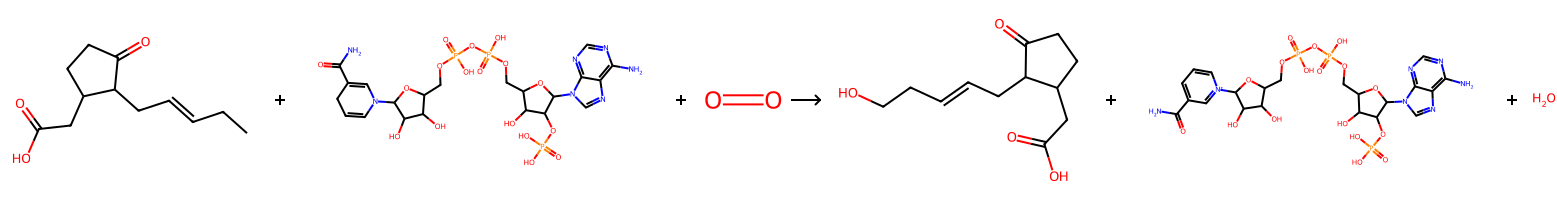

In [4]:
# Problematic
problems = [
    # ('P019f0330406c83b4d12823f480e8f68c006ef345', -1),
    # ('P4d4cf75ccd62b55a0686f46d6e4b52d860725fe5', 1),
    # ('P5b5ed50f979c6bad62a65d71da88a84d4a259348', 0),
    # ('P77b28de7590b39ebcf60a7a4f4bdde47767f2ae7', 1),
    # ('Pef934dc8b4ba9f348f2d530a575a4467c056459f', 1), # Might be real, but not a good analogue
    # ('P2eb5a964bdc1db846cd9496f22d0eda68941ab3d', -1),
    # ('P105ebcd3f73ba8e8128c306b562a8f7b767f82ac', 0),
    ('P5e033865e704f3d5925c1b4ec3f4049cdc142432', 0),
    # ('P7be7bf79ebd9f6bf1faf024bb7ddd7cd38dab369', 0)
]

for pid, step in problems:
    show_problem(pid, step)
    print('\n')

In [21]:
known_reactions = load_json(filepaths['sprhea'] / "sprhea_240310_v4_mapped.json")
known_reactions = {k:v for k,v in known_reactions.items() if v['imt_rules']}
imt_of_i = 'rule0028_47'
rxns_of_i = {k: rxn for k, rxn in known_reactions.items() if imt_of_i in rxn['imt_rules']}

716
[23897]
rule0250 ['rule0028_49', 'rule0028_47', 'rule0028_49']


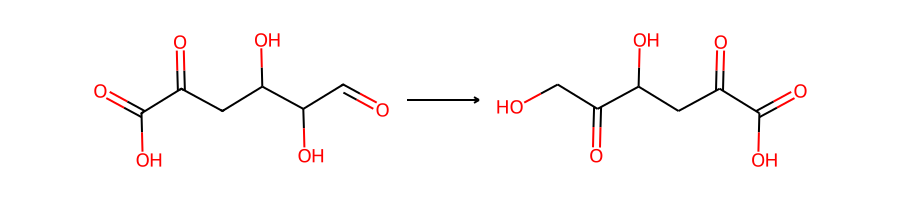

766
[14266]
rule0028 ['rule0028_47', 'rule0028_47']


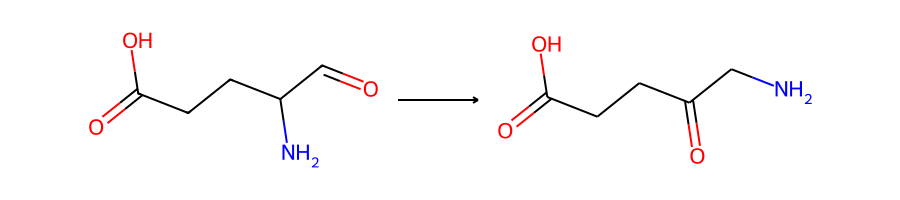

787
[14267]
rule0028 ['rule0028_47', 'rule0028_47']


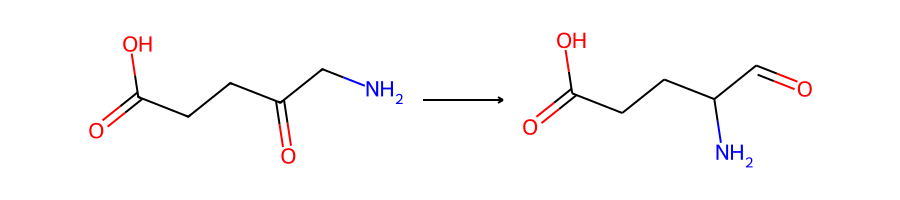

1379
[27703]
rule0250 ['rule0028_26', 'rule0028_26', 'rule0028_46', 'rule0028_47', 'rule0936_3']


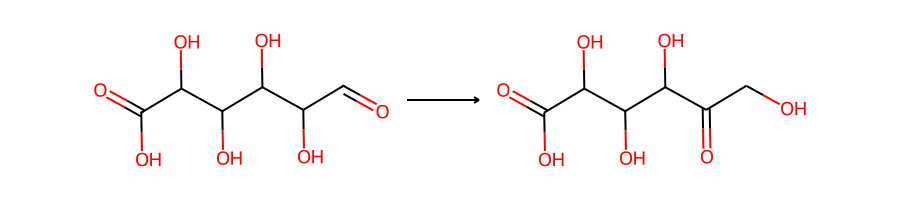

1990
[27704]
rule0250 ['rule0028_23', 'rule0028_23', 'rule0028_46', 'rule0028_47', 'rule0028_49', 'rule0936_3']


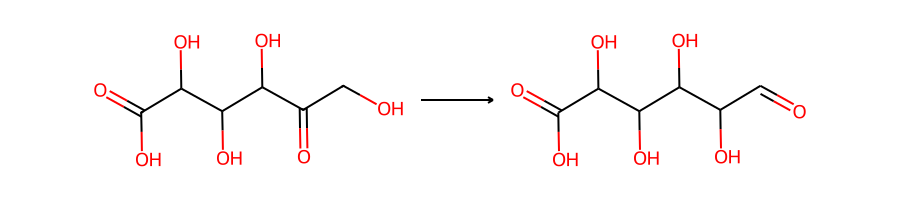

2468
[23898]
rule0250 ['rule0028_23', 'rule0028_23', 'rule0028_47']


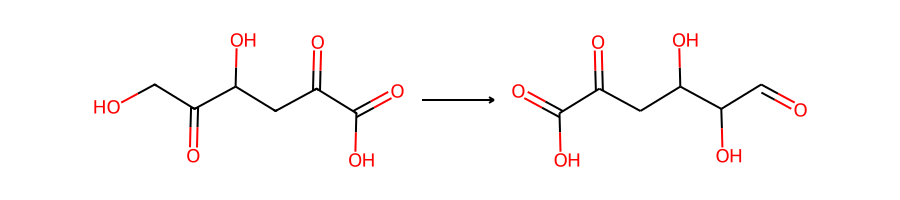

3611
[25842]
rule0250 ['rule0028_23', 'rule0028_23', 'rule0028_46', 'rule0028_47', 'rule0028_49']


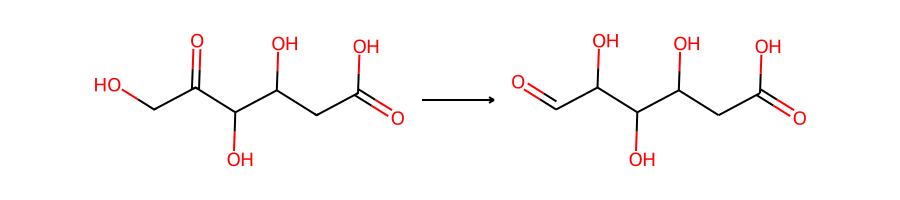

3658
[28932]
rule0153 ['rule0028_47', 'rule0040_7']


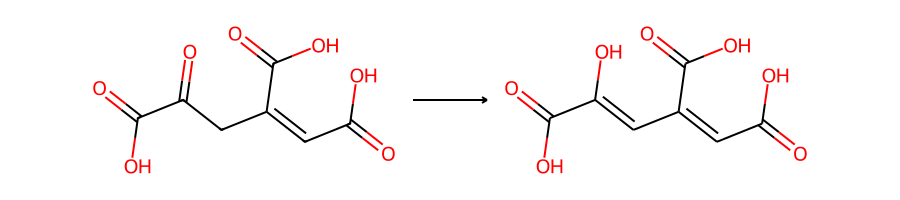

4091
[28933]
rule0175 ['rule0175_1', 'rule0028_47', 'rule0040_7', 'rule0175_1', 'rule0390_1']


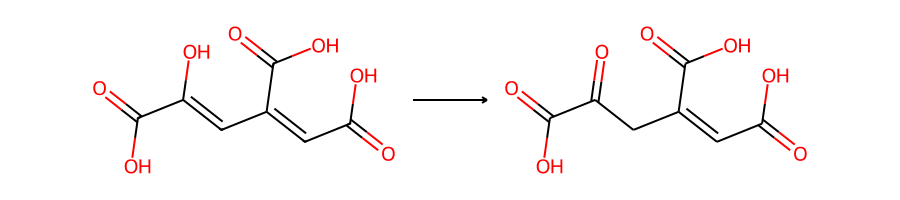

10671
[58505]
rule0040 ['rule0040_7', 'rule0028_47', 'rule0040_7']


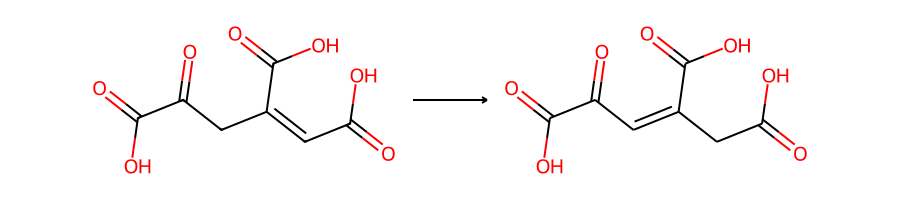

10818
[25841]
rule0250 ['rule0028_49', 'rule0028_46', 'rule0028_47', 'rule0028_49']


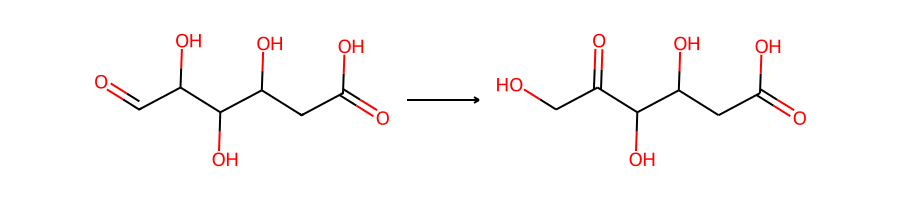

12249
[14895]
rule0028 ['rule0028_47', 'rule0028_47']


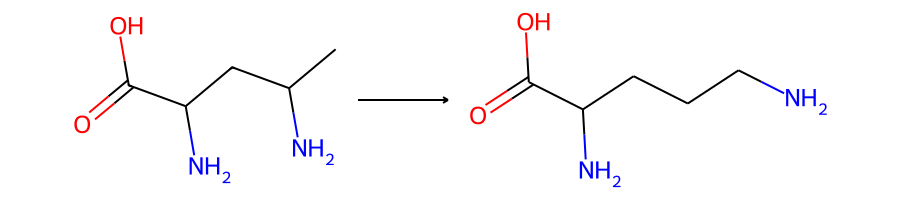

14967
[14894]
rule0028 ['rule0028_47', 'rule0028_47']


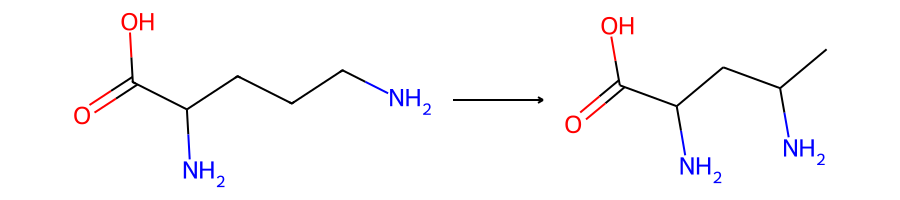

15515
[38269]
rule0028 ['rule0028_47', 'rule0028_47']


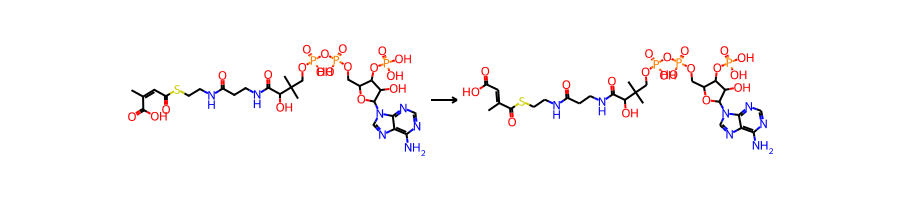

In [28]:
for k, elt in rxns_of_i.items():
    print(k)
    print(elt['rhea_ids'])
    print(elt['min_rule'], elt['imt_rules'])
    rxn = Chem.rdChemReactions.ReactionFromSmarts(elt['smarts'], useSmiles=True)
    pic = Draw.ReactionToImage(rxn, useSVG=True, subImgSize=(300, 200))
    display(SVG(pic))

In [25]:
map_res = pd.read_csv(
    filepath_or_buffer=filepaths['operator_mapping'] / "operator_mapping_sprhea_v3_min_ops.tsv",
    sep='\t'
).set_index("Reaction ID")
map_res.head()

,Rule,Aligned smarts,Reaction center
Reaction ID,,,
0,rule0267,NC(CCC=O)C(=O)O.NC(=O)c1ccc[n+](C2OC(COP(=O)(O...,"((4,), (3, 4, 5, 6, 7, 47), (2,))"
1,rule0071,CC(O)C(O)C(O)C(O)C(=O)O>>CC(O)C(O)CC(=O)C(=O)O.O,"((5, 6, 7, 8),)"
3,rule0117,CSCCC(=O)C(=O)O.O=CO>>CSCCC(=O)C(O)=CO.O=O,"((6, 7), (1, 0))"
5,rule0009,Nc1nc2c(ncn2C2OC(COP(=O)(O)OP(=O)(O)OC3OC(CO)C...,"((21, 20), (37,))"
6,rule0007,*C(=O)NC(*)C(=O)OC1C(COP(*)(=O)O)OC(n2cnc3c(N)...,"((6, 8), (0,))"


In [29]:
map_res.loc[787]

Rule                                       rule0028
Aligned smarts     NCC(=O)CCC(=O)O>>NC(C=O)CCC(=O)O
Reaction center                        ((1, 2, 4),)
Name: 787, dtype: object